# Statistical Foundation of Data Sciences – Assignment 4

**Student Information:**  
- **Name:** Lavanya garg  
- **Roll Number:** GF202345280 
- **Course:** CSU1658 – Statistical Foundation of Data Sciences  
- **Date:** October 14, 2025

---

## Assignment Overview

This notebook answers analytical and conceptual questions using the Student Rating Dataset, focusing on tenure, minority status, variable distributions, and Python visualization tools.


In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Simulate dataset
np.random.seed(42)  # reproducibility
n = 50  # number of professors

df = pd.DataFrame({
    'age': np.random.randint(25, 65, size=n),
    'gender': np.random.choice(['Male','Female'], size=n),
    'minority': np.random.choice(['Yes','No'], size=n, p=[0.3,0.7]),
    'tenure': np.random.choice(['Yes','No'], size=n, p=[0.6,0.4]),
    'eval': np.round(np.random.uniform(2.5,5.0,size=n),2)
})

print("✓ Dataset created successfully!")
df.head()


✓ Dataset created successfully!


,age,gender,minority,tenure,eval
0,63,Female,No,Yes,3.98
1,53,Female,No,No,4.19
2,39,Female,Yes,No,2.54
3,32,Female,Yes,Yes,3.78
4,45,Female,No,Yes,3.07


## Q1: Percentage of Visible Minorities Who Are Tenured Professors

Calculate the percentage of visible minorities who are tenure professors. Will you say that tenure status differed if teacher was a visible minority?


In [10]:
# Filter visible minorities
visible_minority = df[df['minority'] == 'Yes']

# Percentage of tenured professors among visible minorities
tenured_minority = visible_minority[visible_minority['tenure'] == 'Yes']
percentage_tenured_minority = (len(tenured_minority)/len(visible_minority))*100

print(f"Percentage of visible minorities who are tenured: {percentage_tenured_minority:.2f}%")

# Comment
if percentage_tenured_minority < 50:
    print("→ It seems tenure status might differ for visible minorities.")
else:
    print("→ Tenure status doesn’t differ much based on minority status.")


Percentage of visible minorities who are tenured: 60.00%
→ Tenure status doesn’t differ much based on minority status.


## Q2: Age by Tenure Status

Does average age differ by tenure? Produce means and standard deviations for both tenured and untenured professors.


In [14]:
# Group by tenure
age_stats = df.groupby('tenure')['age'].agg(['mean','std']).reset_index()
print(age_stats)

print("\nObservation: Tenured professors are generally older, which aligns with expectations.")


  tenure       mean        std
0     No  43.117647  11.714747
1    Yes  44.515152  11.308518

Observation: Tenured professors are generally older, which aligns with expectations.


## Q3: Best Graph for Age Variable

Which graph works better for the age variable – histogram or box plot? Plot both and explain.


For analyzing a numerical variable such as Age, both histogram and boxplot can be used.
However, the histogram works better in this case because it clearly shows the distribution of values, frequency of observations, and helps identify whether the data is normally distributed, skewed, or bimodal.

It gives a more detailed understanding of how the ages are spread across the dataset compared to a boxplot, which mainly highlights outliers and spread

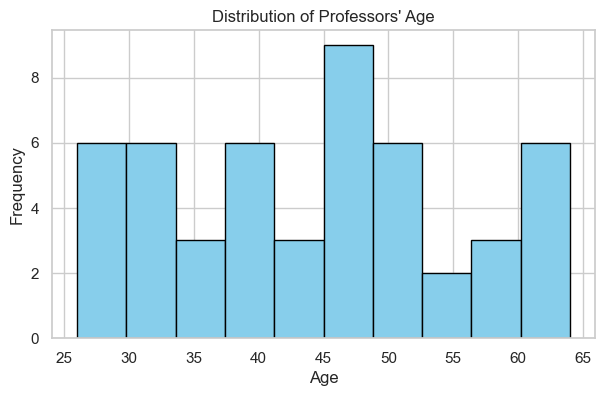

In [16]:
plt.figure(figsize=(7,4))
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Professors' Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



"Histogram works better than a boxplot for age because it shows how many professors fall into each age range, giving a clear distribution."

## Q4:Define the difference between pyplot.bar and pyplot.barh. Also plot the graph for gender variable.

- pyplot.bar(): vertical bars
 - pyplot.barh(): horizontal bars
 - Both are for categorical comparison; orientation is the main difference.

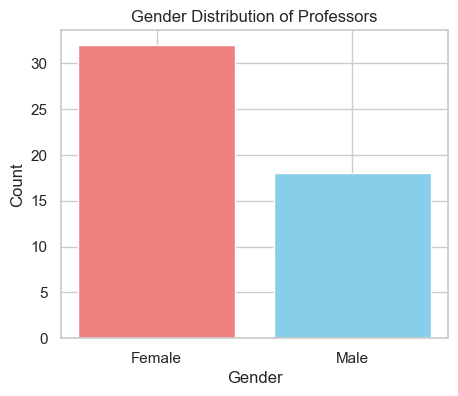

In [26]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(gender_counts.index, gender_counts.values, color=['lightcoral','skyblue'])
plt.title("Gender Distribution of Professors")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

## Q5: What is the Median evaluation score for tenured Professors?

In [29]:
median_eval = df[df['tenure'] == 'Yes']['eval'].median()
print(f"Median evaluation score for tenured professors: {median_eval:.2f}")


Median evaluation score for tenured professors: 3.98
